In [2]:
import pandas as pd
from statsmodels.tsa.holtwinters import Holt

In [6]:
FILE_PATH = './2022_HiMCM_Data_Datetime.xlsx'
CO2_PPM_ANNUALLY = pd.read_excel(FILE_PATH, sheet_name='CO2 Data Set 1', index_col='Year')
CO2_PPM_ANNUALLY.index = CO2_PPM_ANNUALLY.index.to_period('y')

CO2_PPM_ANNUALLY

,PPM
Year,
1959,315.98
1960,316.91
1961,317.64
1962,318.45
1963,318.99
...,...
2017,406.76
2018,408.72
2019,411.66


<AxesSubplot:xlabel='Year'>

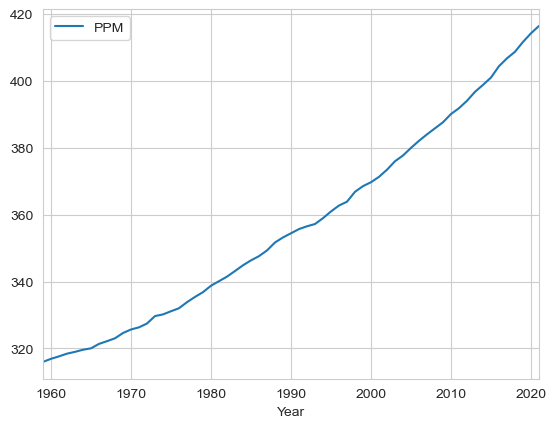

In [7]:
CO2_PPM_ANNUALLY.plot()

C:\Users\yohan\AppData\Local\Temp\ipykernel_2532\1249009441.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Holt'] = fitted_model.fittedvalues


<AxesSubplot:xlabel='Year'>

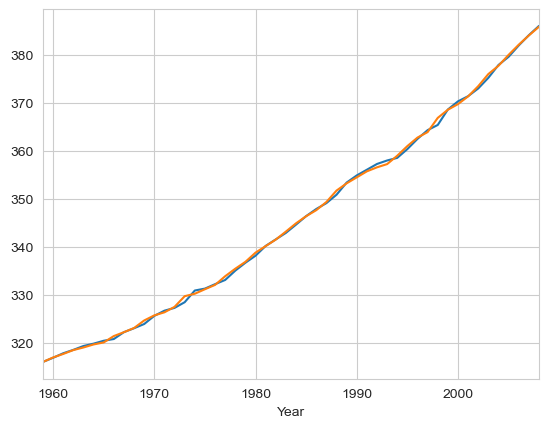

In [8]:
SET_CNT = CO2_PPM_ANNUALLY.shape[0]
TRAIN_SET_CNT = int(SET_CNT * 0.8)
TEST_SET_CNT = SET_CNT - TRAIN_SET_CNT

train_set = CO2_PPM_ANNUALLY[:TRAIN_SET_CNT]

fitted_model = Holt(train_set, damped_trend=False, exponential=True).fit(optimized=True)

train_set['Holt'] = fitted_model.fittedvalues
train_set['Holt'].plot()
train_set['PPM'].plot()

C:\Users\yohan\AppData\Local\Temp\ipykernel_2532\3109085339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Holt'] = fitted_model.forecast(TEST_SET_CNT)


<AxesSubplot:xlabel='Year'>

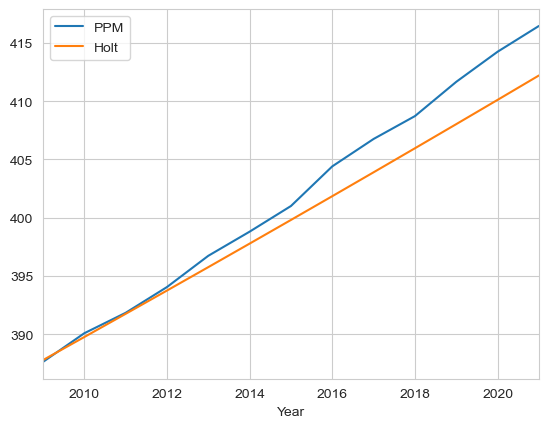

In [9]:
test_set = CO2_PPM_ANNUALLY[TRAIN_SET_CNT:]
test_set['Holt'] = fitted_model.forecast(TEST_SET_CNT)
test_set.plot()

In [10]:
fitted_model.summary()

Dep. Variable:,PPM,No. Observations:,50
Model:,Holt,SSE,11.491
Optimized:,True,AIC,-65.522
Trend:,Multiplicative,BIC,-57.874
Seasonal:,None,AICC,-63.569
Seasonal Periods:,None,Date:,"Mon, 13 Mar 2023"
Box-Cox:,False,Time:,19:27:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,0.1678091,beta,True
